# Data Preparation: Transformations

Data transformation is a commonly used approach in machine learning problems to refine raw features to improve their significance. Similarly, in time series forecasting we remove noise and improve signals using various mathematical transforms.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from PIL import Image
import requests
from io import BytesIO
plt.style.use("seaborn-whitegrid")

## Polynomial Transform

A time series that has a quadratic or cubic growth trend can be made linear by transforming the raw data to its square root or cube root. Let’s randomly generate a series with a cubic function to check the transformation effect.

In [2]:
# generate a cubic time series
series = pd.Series(np.array([x**3 for x in range(1,100)]))

In [3]:
# cube-root transform
transform = np.cbrt(series)

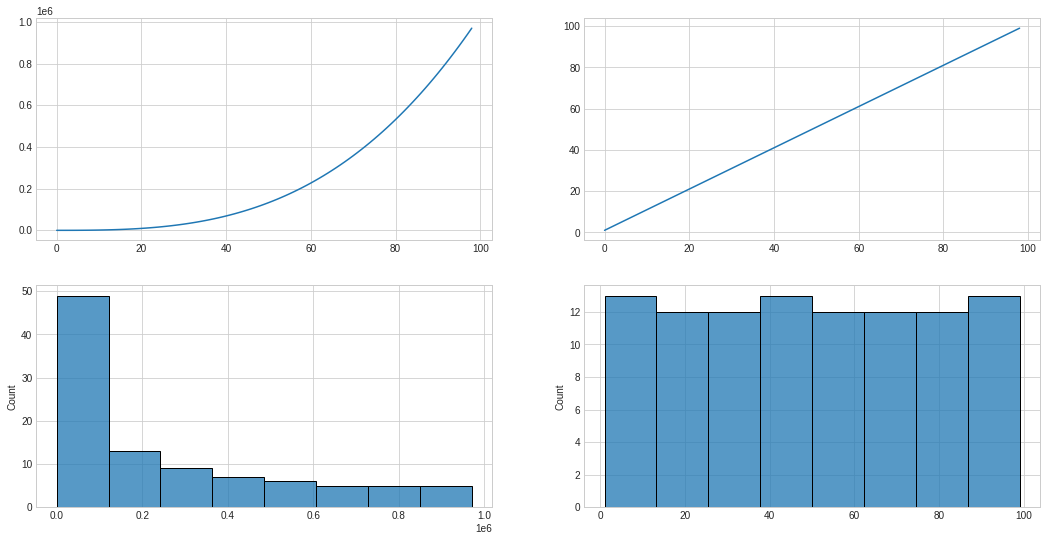

In [4]:
# plot cubic and cube-root series
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,9))

axes[0][0].plot(series)
sns.histplot(data=series, ax=axes[1][0])

axes[0][1].plot(transform)
sns.histplot(data=transform, ax=axes[1][1])

plt.show()

## Logarithmic Transform

Sometimes we come across data with more extreme trends better known as exponential, such time-series data can be made linear by taking the log of the raw values. Let’s generate data from exponential distribution using the following code.


In [5]:
# generate an exponential time series
series = pd.Series(np.array([np.exp(x) for x in range(1,100)]))

In [6]:
# log transform
transform = np.log(series)

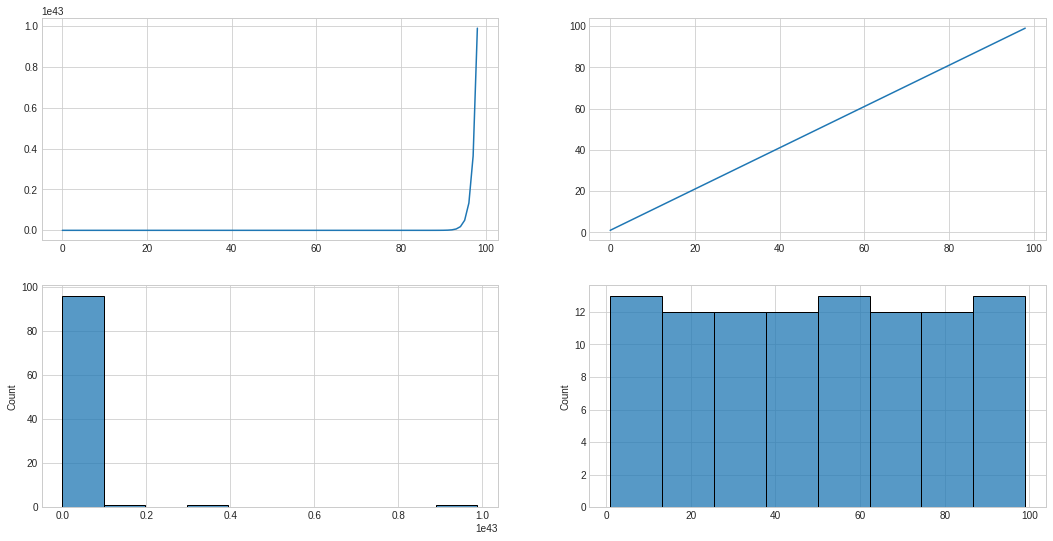

In [7]:
# plot exponential and log series
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,9))

axes[0][0].plot(series)
sns.histplot(data=series, bins=10, ax=axes[1][0])

axes[0][1].plot(transform)
sns.histplot(data=transform, ax=axes[1][1])

plt.show()

## Box-Cox

In real life often we come across observations that don’t have a clear trend and before concluding an appropriate transformation approach, different transformations have to be tested. Luckily we have this statistical technique that analyses the given series and automatically performs the most appropriate transformation according to following lambda values. These are some common values for lambda and respective transformation.

- First, we will manually transform based on our intuition, and 
- next, we will use box-cox transformation and see the difference.

In [8]:
url = "https://raw.githubusercontent.com/lucaskienast/Time-Series-Analysis/main/1)%20Data%20Preparation/Common%20Box%20Cox%20Transformations.png"
page = requests.get(url)

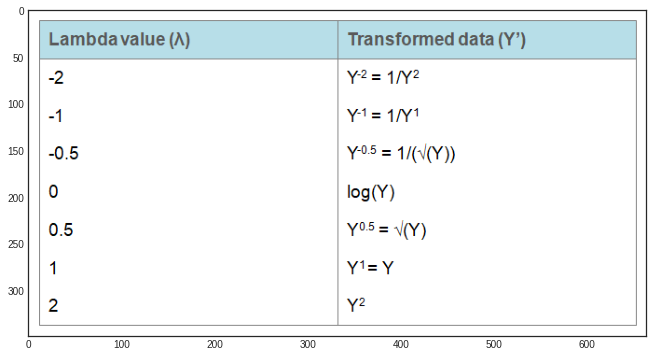

In [9]:
plt.style.use("seaborn-white")
plt.figure(figsize=(15,6))
img = Image.open(BytesIO(page.content))
plt.imshow(img)
plt.show()

In [10]:
# get example data
url = "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv"
raw_df = pd.read_csv(url, parse_dates=["date"], index_col="date")
raw_df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [11]:
# manual transformation (none here : lambda=1)
manual_df = raw_df.copy()
manual_df["value"] = boxcox(manual_df["value"], lmbda=1.0)

In [12]:
# box-cox transformation
boxcox_df = raw_df.copy()
boxcox_df["value"], lam = boxcox(boxcox_df["value"])
print("Lambda: {:.2f}".format(lam))

Lambda: 0.06


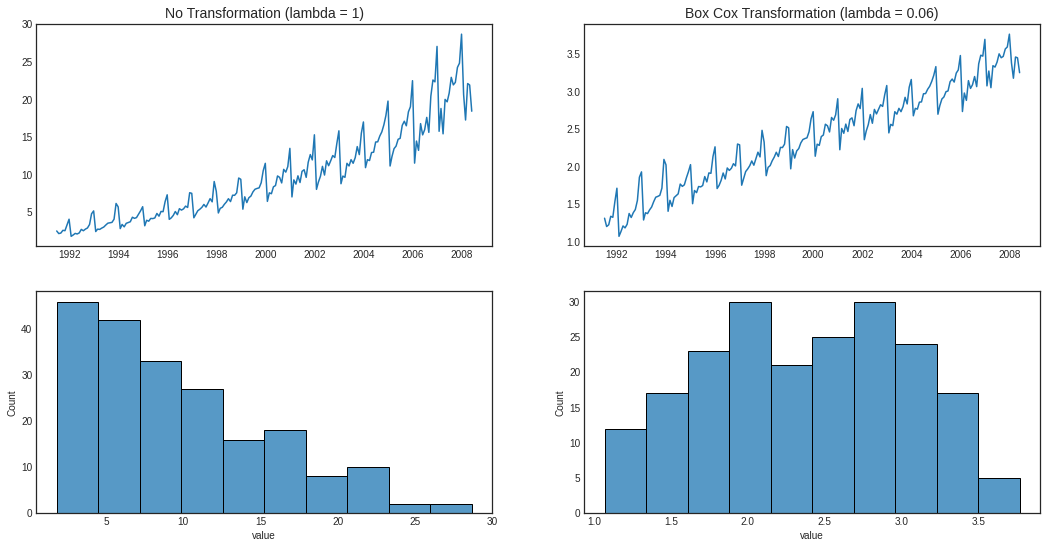

In [13]:
# plot manual and box-cox transformation with original
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,9))

axes[0][0].set_title("No Transformation (lambda = 1)", fontsize=14)
axes[0][0].plot(manual_df)
sns.histplot(data=manual_df, x="value", bins=10, ax=axes[1][0])

axes[0][1].set_title("Box Cox Transformation (lambda = {:.2f})".format(lam), fontsize=14)
axes[0][1].plot(boxcox_df)
sns.histplot(data=boxcox_df, x="value", bins=10, ax=axes[1][1])

plt.show()